In [1]:
import sys
sys.path.append("../scripts/")
from GridMap import *
from mdp import *
import math
import copy
from matplotlib.animation import PillowWriter    #アニメーション保存用

In [2]:
class DynamicProgramming(MDP):
    def __init__(self, grid_map_world, drawPath=True, drawV=False, drawPI=False):
        super().__init__(grid_map_world)
        self.drawVflag = drawV
        self.drawPIflag = drawPI
        self.drawPathflag = drawPath
    
    def draw(self, ax, elems):
        self.sweep()    #状態価値関数の更新
        self.updatePI()    #方策改善
        
        if(self.drawVflag):
            self.drawV(ax, elems)
        elif(self.drawPIflag):
            self.drawPI(ax, elems)
        if(self.drawPathflag):
            self.drawPath(ax, elems)
    
    #方策改善
    def updatePI(self):
        for x in range(len(self.grid_map)):
            for y in range(len(self.grid_map[0])):
                s = [x, y]
                v = self.V(s)
                pi = self.PI(s)
                if(self.isGoal([x, y])):
                    continue
                a_list = []
                for a in range(9):
                    v = 0
                    for s_ in self.listNeigbor(s):
                        v += self.p(s, a, s_) * (self.R(s, a, s_) + self.V(s_))
                    a_list.append(v)
                self.pi_map[x][y] = np.argmax(a_list)
       
    #方策描画
    def drawPI(self):
        c_num = int(self.PI([x, y]))
        if(c_num == 0):
            c = "black"
        elif(c_num == 1):
            c = "saddlebrown"
        elif(c_num == 2):
            c = "magenta"
        elif(c_num == 3):
            c = "blue"
        elif(c_num == 4):
            c = "cyan"
        elif(c_num == 5):
            c = "green"
        elif(c_num == 6):
            c = "lime"
        elif(c_num == 7):
            c = "yellow"
        elif(c_num == 8):
            c = "orange"
        elif(c_num == 9):
            c = "red"
        else:
            c = "white"
        r = patches.Rectangle(
            xy=(x*self.world.grid_step[0], y*self.world.grid_step[1]),
            height=self.world.grid_step[0],
            width=self.world.grid_step[1],
            color=c,
            fill=True,
            alpha=0.5
        )
        elems.append(ax.add_patch(r))
    
    #経路描画
    def drawPath(self, ax, elems):
        self.pathFlag = np.full(self.grid_map.shape, False)
        s = copy.copy(self.world.start_index)
        a = self.PI(s)
        while(not(self.isOutOfBounds(s) or self.isObstacle(s) or self.isGoal(s) or a == 0)):
            if not(self.isStart(s)):
                r = patches.Rectangle(
                    xy=(s[0]*self.world.grid_step[0], s[1]*self.world.grid_step[1]),
                    height=self.world.grid_step[0],
                    width=self.world.grid_step[1],
                    color="red",
                    fill=True,
                    alpha=0.5
                )
                elems.append(ax.add_patch(r))
                
            a = self.PI(s)
            if(a == 0):
                break
            if(a == 1 or a == 2 or a == 8):
                s[0] += 1
            elif(a == 4 or a == 5 or a == 6):
                s[0] -= 1
            if(a == 2 or a == 3 or a == 4):
                s[1] += 1
            elif(a == 6 or a == 7 or a == 8):
                s[1] -= 1

<IPython.core.display.Javascript object>


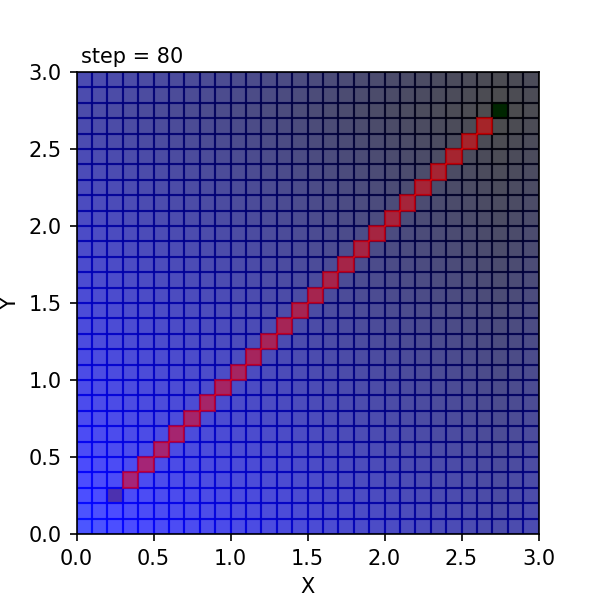

In [3]:
if __name__ == "__main__":
    time_span = 8
    time_interval = 0.1
    
    grid_step = np.array([0.1, 0.1])
    grid_num = np.array([30, 30])
    
    map_data = "../csvmap/map1.csv"
    
    world = GridMapWorld(grid_step, grid_num, time_span, time_interval, map_data, debug=False)
    world.append(DynamicProgramming(world, drawPath=1, drawV=1, drawPI=0))
    
    world.draw()
    #world.ani.save('dynamicProgramming_map2_policy.gif', writer='pillow', fps=100)    #アニメーション保存